In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # plotting
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [191]:
# Loading the CSV file into a pandas dataframe.
#source: https://archive.ics.uci.edu/dataset/186/wine+quality
#df = pd.read_csv("winequality-red.csv",names=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"],sep = ';',header=None)
df = pd.read_csv("winequality-red.csv")
# To peek at first five rows
df.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# New Section

In [192]:
# To identify the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [193]:
# Getting the number of instances and features
df.shape

(1599, 12)

In [194]:
# Getting the dimensions of the data frame
df.ndim

2

In [195]:
# Finding the null values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [196]:
#Descriptive Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [197]:
#check duplicated recotd
df.duplicated().sum()

240

In [198]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(1359, 12)

In [199]:
#Descriptive Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


<Axes: title={'center': 'Distribution of Red Wine Quality Ratingse'}>

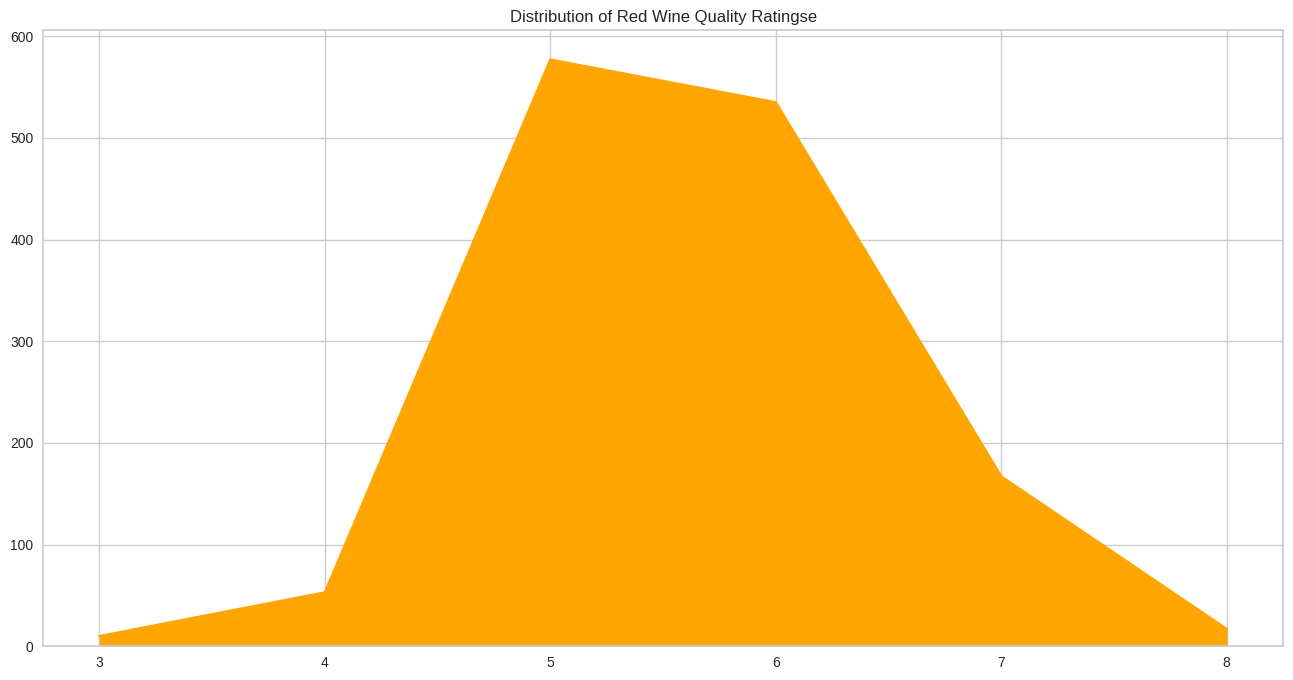

In [200]:
df['quality'].value_counts().sort_index().plot.area(figsize=(16,8),title='Distribution of Red Wine Quality Ratingse',color='orange')
#our data set was unbalanced. Most of the quality values were 5 and 6

In [201]:
print(df['quality'].value_counts())

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64


<Axes: >

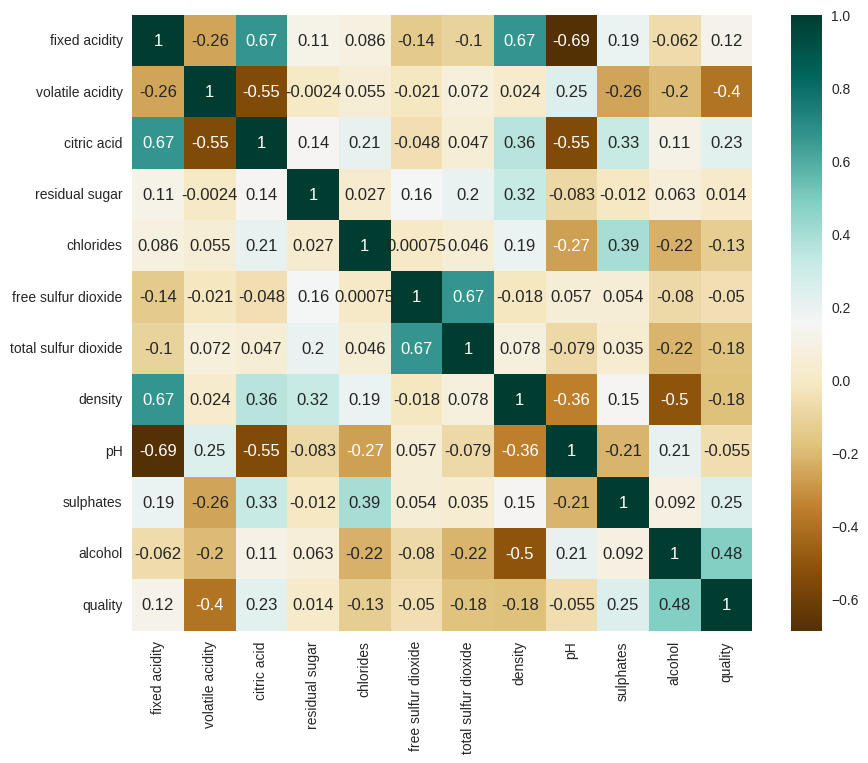

In [202]:
# Plotting a Seaborn Correlation heat map
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)

In [203]:
#Wine quality has the highest positive correlation with alcohol.
#Other relation degrees are very low with each other,such as fixed acidity, citric acid,residual sugar, free sulfur dioxide and pH.
#Quality also has negative correlation with variables such as volatile acidity, chlorides, total_sulfur_dioxide and density.
#Wine quality has the highest negative correlation with volatile acidity.
#we could remove some features however since in total we only have 11 variable, I prefer not to drop any columns.

<Axes: xlabel='quality', ylabel='alcohol'>

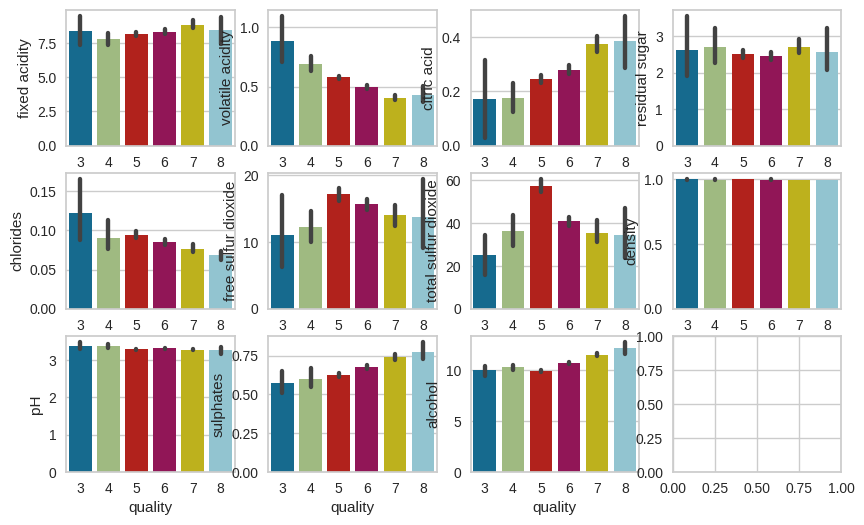

In [204]:

#Check the outliers for each feature with respect to output value
fig, ax1  = plt.subplots(3,4,figsize = (10,6))
#fixed acidity does not give any specification to classify the quality.
sns.barplot(x = 'quality', y = 'fixed acidity', data = df, ax = ax1 [0][0])
#Reverse trend in the volatile acidity wrt the quality
sns.barplot(x = 'quality', y = 'volatile acidity', data = df, ax = ax1 [0][1])
#Citric acid goes higher as the quality of the wine goes higher
sns.barplot(x = 'quality', y = 'citric acid', data = df, ax = ax1 [0][2])
#residual sugar is irrelevant to the quality
sns.barplot(x = 'quality', y = 'residual sugar', data = df, ax = ax1 [0][3])
#Chloride goes down as the quality of the wine goes higher
sns.barplot(x = 'quality', y = 'chlorides', data = df, ax = ax1 [1][0])
#no direct relationship with free sulfur dioxide
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df, ax = ax1 [1][1])
#no direct relationship with total sulfur dioxid
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df, ax = ax1 [1][2])
#no direct relationship with density
sns.barplot(x = 'quality', y = 'density', data = df, ax = ax1 [1][3])
#PH decreases wrt to quality of wine
sns.barplot(x = 'quality', y = 'pH', data = df, ax = ax1 [2][0])
#Sulphates level goes higher with the quality of wine
sns.barplot(x = 'quality', y = 'sulphates', data = df, ax = ax1 [2][1])
#Alcohol level also goes higher as the quality of wine increases
sns.barplot(x = 'quality', y = 'alcohol', data = df, ax = ax1 [2][2])


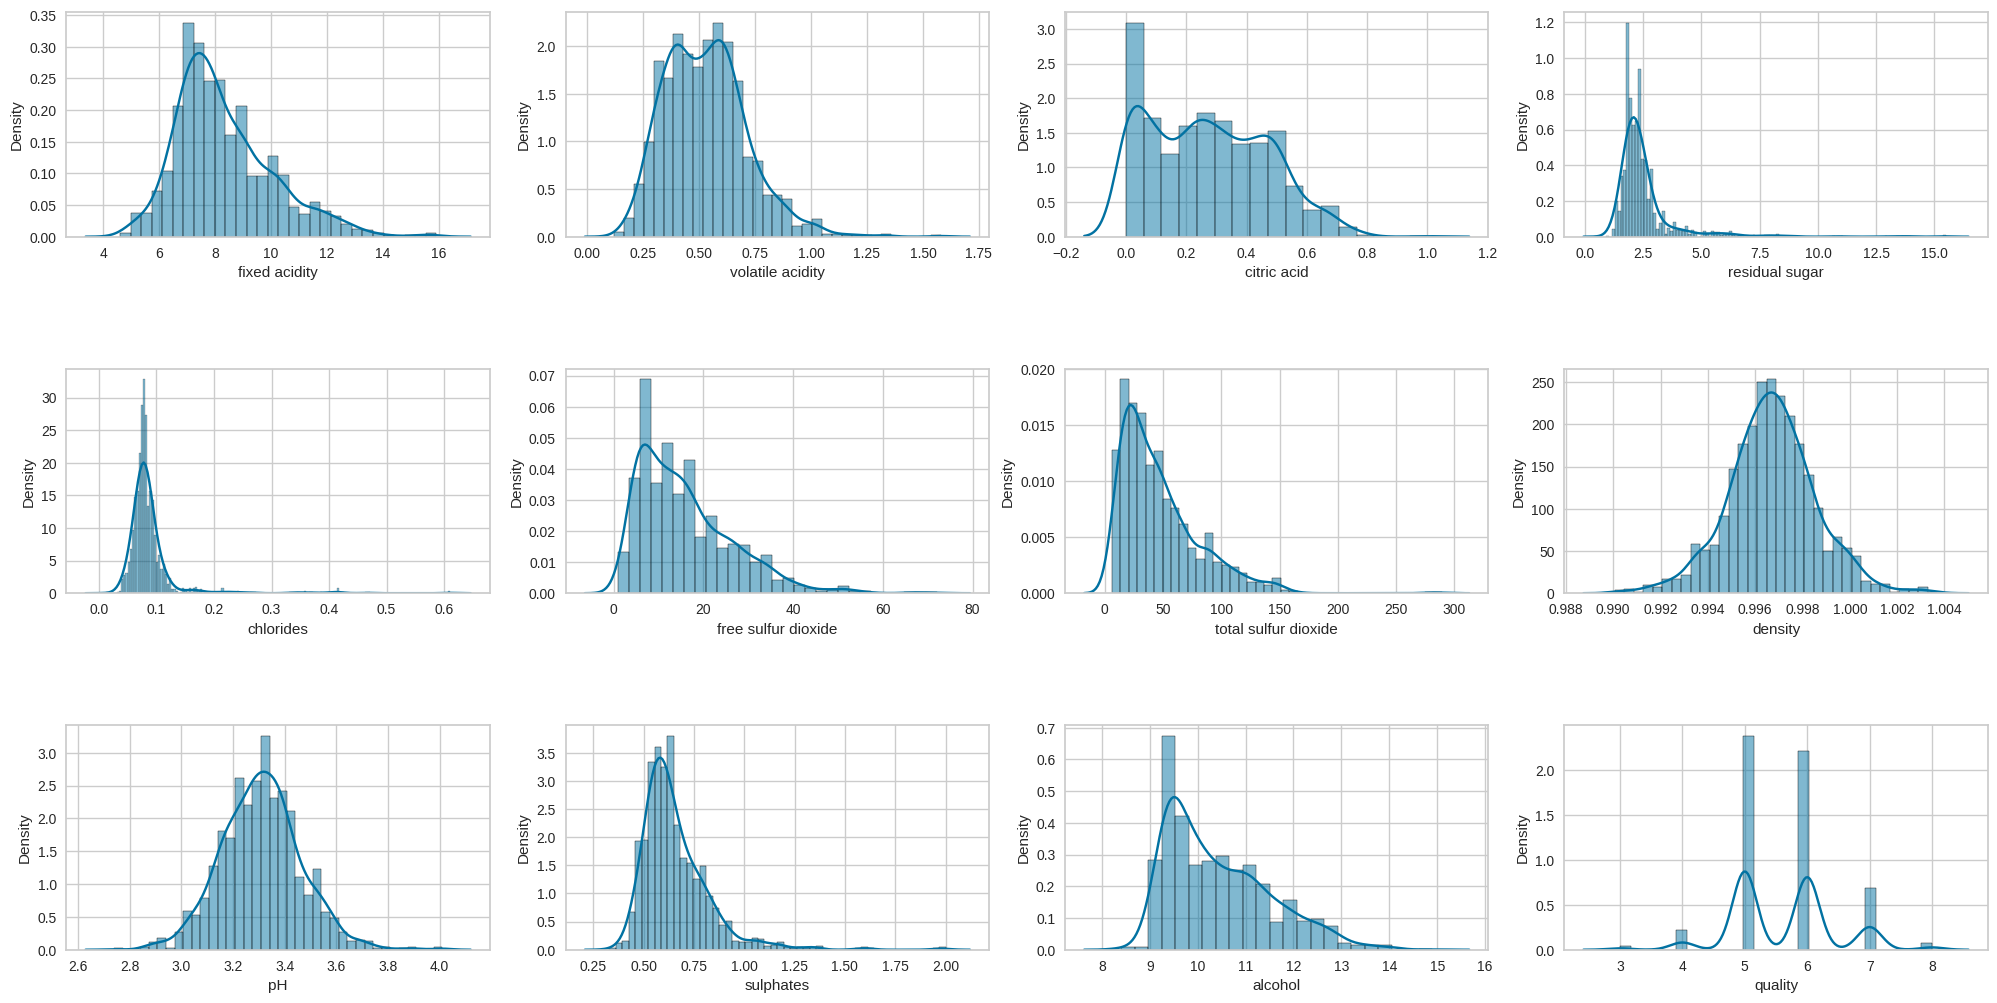

In [205]:
#Dist plot of all features:
# create dist plot
#df.displot(figsize=(12,12))
#plt.show()
# create dist plot
import seaborn as sns
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.histplot(value, ax=ax[index], kde=True,
                     stat="density", kde_kws=dict(cut=3))
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

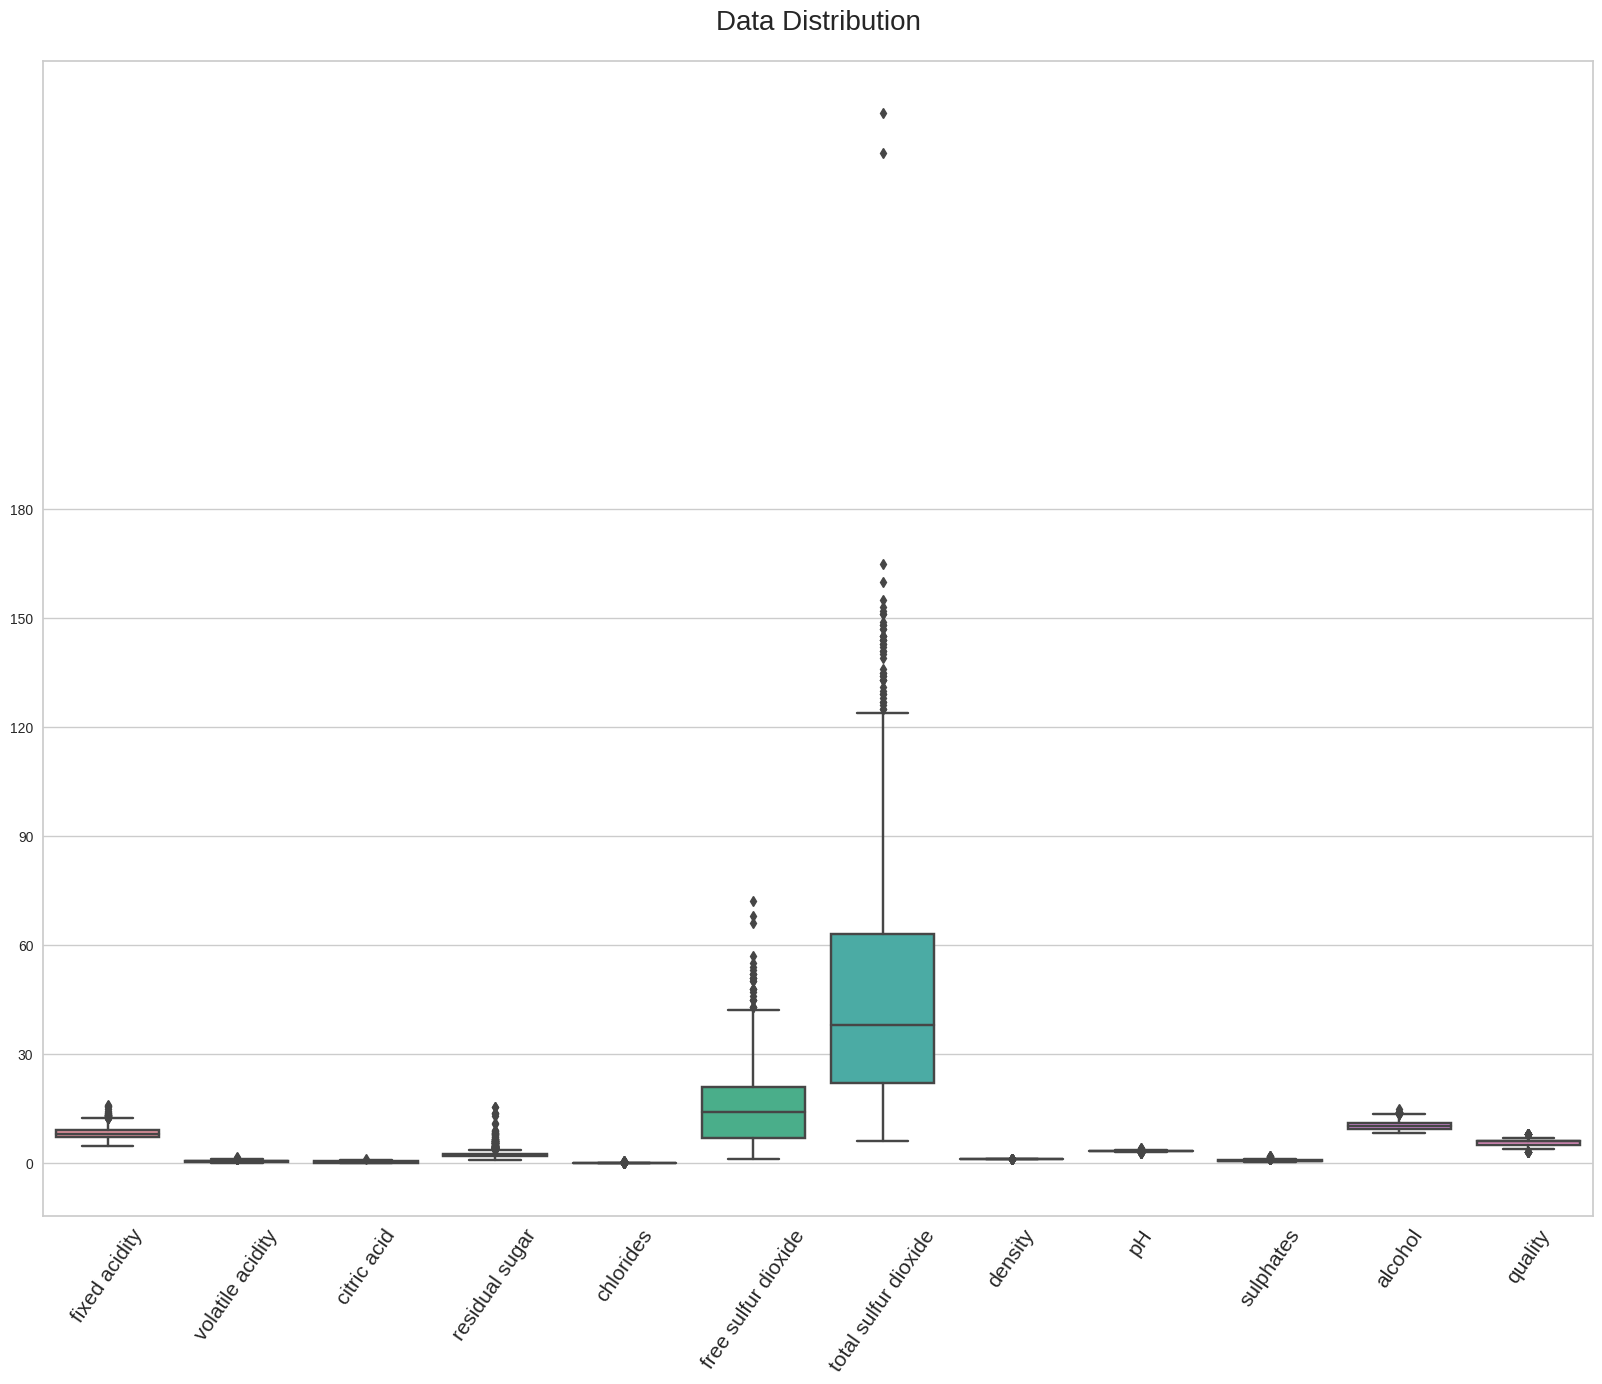

In [206]:
#Check the outliers for each feature

plt.figure(figsize=(20,15))
sns.boxplot(data=df)
plt.yticks(range(0,200,30))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution', size=20, y=1.02)
plt.show()

In [207]:
#there are some serious outliers in the residual sugar, free sulfur dioxide and total sulfur dioxide columns
#the raw data should be preprocessed for getting higher precision rates.
#according to my literature review, some papers removed the outliers in the dataset by multiplying 1.5 by the quartile deviation.
#here \i have detected outliers and any other abnormalities that are above three standard deviations from the mean of the column
cols = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']

for c in cols:
    upper_level = df[c].mean() + 3*df[c].std()
    lower_level = df[c].mean() - 3*df[c].std()
    df = df[(df[c] > lower_level) & (df[c] < upper_level)]

# New Section

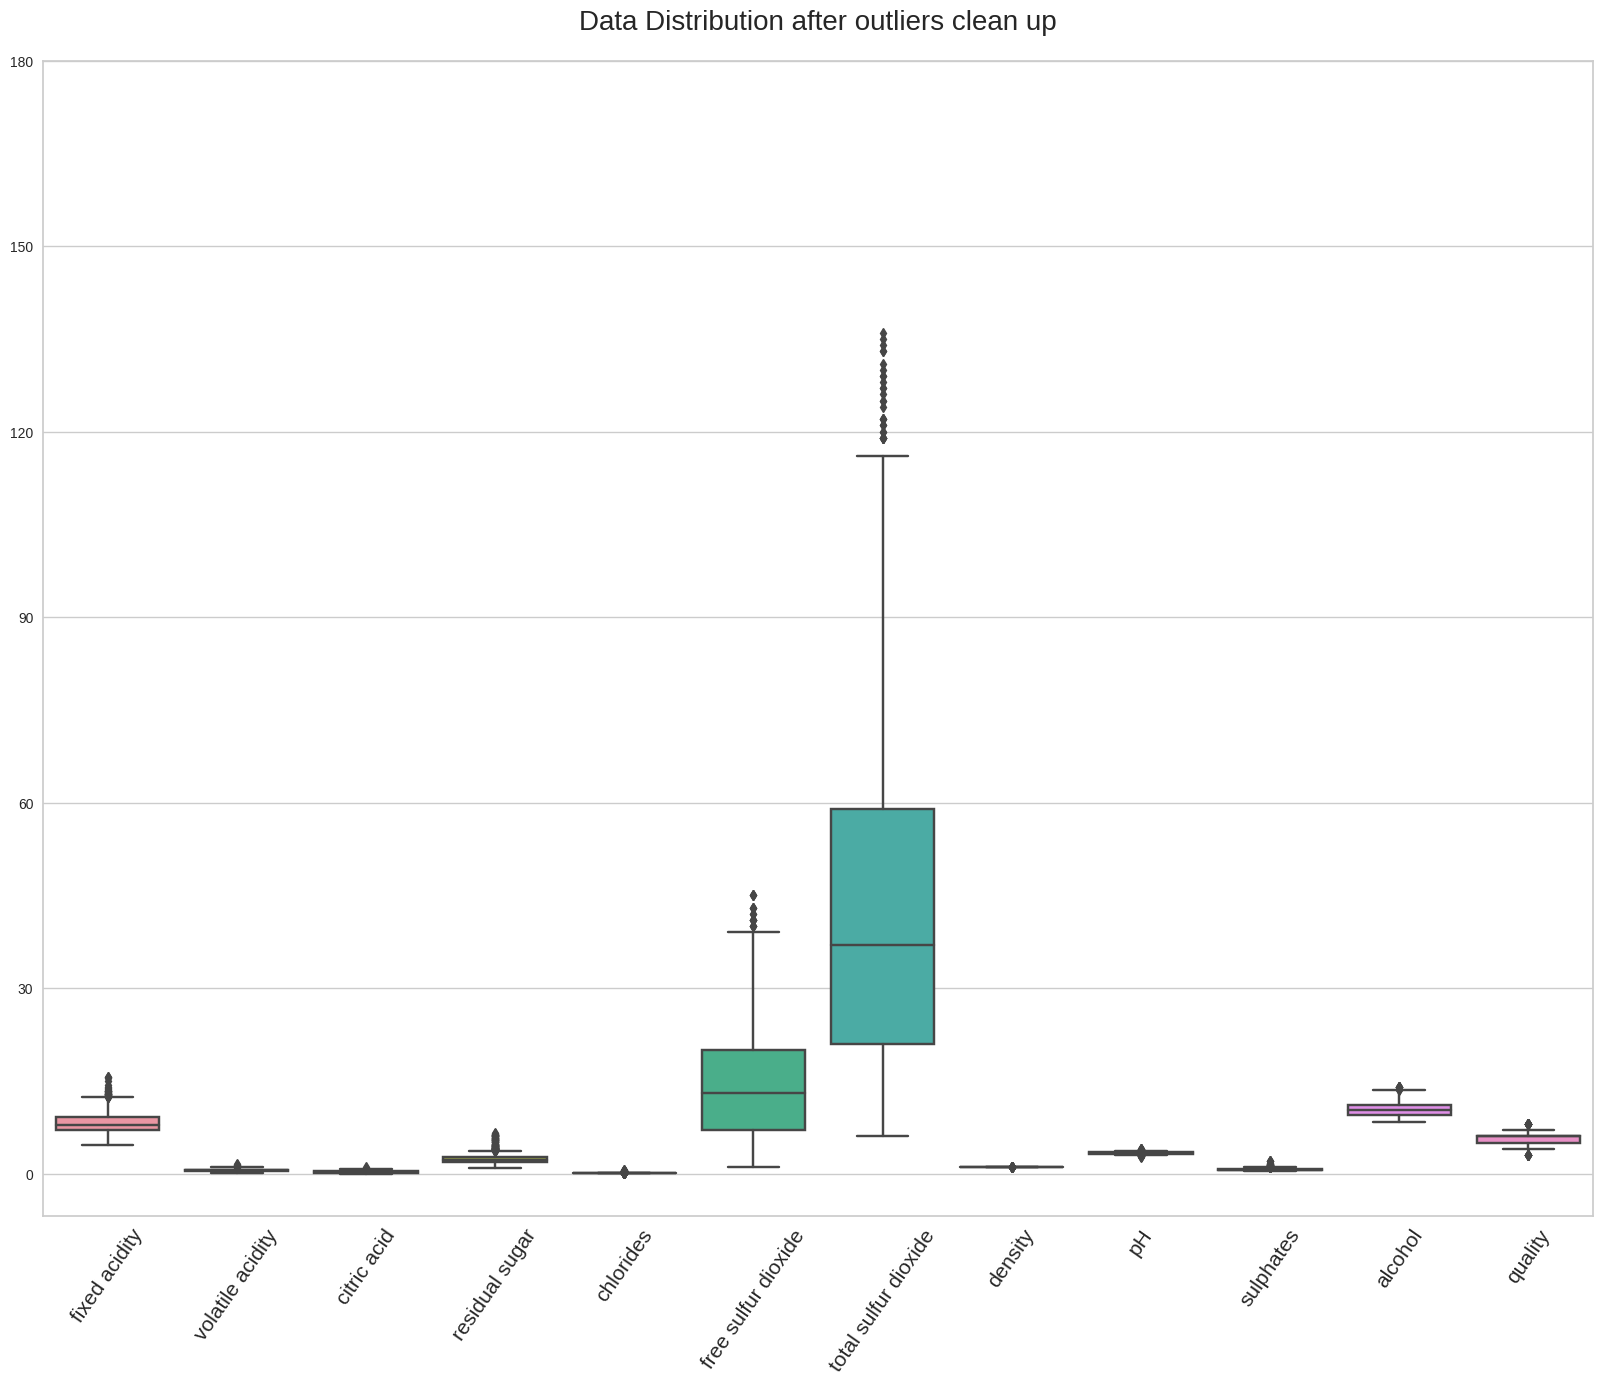

In [208]:
#visualize some of the attrinutes the wine has and look for outliers
plt.figure(figsize=(20,15))
sns.boxplot(data=df)
plt.yticks(range(0,200,30))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution after outliers clean up', size=20, y=1.02)
plt.show()

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#X = df.drop('quality', axis = 1)
# some features show almost no correlation with quality, so i choose to drop few
X = df.drop(['fixed acidity','residual sugar','free sulfur dioxide','quality',], axis = 1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [210]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
# Create Decision Tree classifer object
dt = DecisionTreeClassifier()
# Train Decision Tree Classifer
dt.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = dt.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Macro-averaging F1:",metrics.f1_score(y_test, y_pred,average='macro'))
#print("Macro-Averaged Precision score:",metrics.precision_score(y_test,y_pred, average='macro'))
print("Macro-averaged recall score:",metrics.recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.5057915057915058
Macro-averaging F1: 0.2731661231440662
Macro-averaged recall score: 0.27520487897846385


In [218]:
from sklearn.linear_model import LogisticRegression
dt = LogisticRegression() #select the algorithm
dt.fit(X_train,y_train) # we fit the algorithm with the training data and the training output
#Predict the response for test dataset
y_pred = dt.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Macro-averaging F1:",metrics.f1_score(y_test, y_pred,average='macro'))
#print("Macro-Averaged Precision score:",metrics.precision_score(y_test,y_pred, average='macro'))
print("Macro-averaged recall score:",metrics.recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.555984555984556
Macro-averaging F1: 0.259767527971726
Macro-averaged recall score: 0.2611968744044216


In [219]:
from sklearn.svm import SVC
dt = SVC()
dt.fit(X_train, y_train) #, sample_weight=sample_weight)
y_pred = dt.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Macro-averaging F1:",metrics.f1_score(y_test, y_pred,average='macro'))
#print("Macro-Averaged Precision score:",metrics.precision_score(y_test,y_pred, average='macro'))
print("Macro-averaged recall score:",metrics.recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.5714285714285714
Macro-averaging F1: 0.26978680361033297
Macro-averaged recall score: 0.2674861825805222


In [213]:
#installing pycaret library
pip install pycaret --quiet

SyntaxError: ignored

In [ ]:
pip install pycaret[full] --quiet

In [214]:
# check installed version
import pycaret
pycaret.__version__

'3.2.0'

In [215]:
#the PyCaret classification module can be used for Binary or Multi-class classification problems.
#Build classifier model using pycaret
# ! pip install pycaret
from pycaret.classification import *

In [216]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
# init setup on exp
model = setup(data = df, target = 'quality', session_id = 123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1295, 12)"
5,Transformed data shape,"(1295, 12)"
6,Transformed train set shape,"(906, 12)"
7,Transformed test set shape,"(389, 12)"
8,Numeric features,11
9,Preprocess,True


In [217]:
# compare baseline models and find the best one
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5883,0.5281,0.5883,0.5556,0.5629,0.3322,0.3387,0.7120
lda,Linear Discriminant Analysis,0.5861,0.5237,0.5861,0.5647,0.5719,0.3441,0.3464,0.0390
catboost,CatBoost Classifier,0.5850,0.5177,0.5850,0.5546,0.5640,0.3329,0.3368,9.5880
et,Extra Trees Classifier,0.5839,0.5259,0.5839,0.5495,0.5589,0.3240,0.3289,0.2530
gbc,Gradient Boosting Classifier,0.5806,0.5207,0.5806,0.5584,0.5646,0.3339,0.3369,2.1830
lr,Logistic Regression,0.5795,0.5166,0.5795,0.5360,0.5481,0.3091,0.3149,2.0390
ridge,Ridge Classifier,0.5707,0.0000,0.5707,0.5143,0.5195,0.2797,0.2898,0.1160
xgboost,Extreme Gradient Boosting,0.5673,0.5192,0.5673,0.5409,0.5489,0.3096,0.3127,0.3350
lightgbm,Light Gradient Boosting Machine,0.5540,0.5159,0.5540,0.5211,0.5312,0.2825,0.2868,2.0070
qda,Quadratic Discriminant Analysis,0.5474,0.4986,0.5474,0.5388,0.5399,0.2937,0.2948,0.0570


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
#Tune the parameters and check for the performance of each model
#When set normalize to True, it transforms the features by scaling them to a given range.
#when transformation is set to be true, it applies the power transform to make data more Gaussian-like.
model = setup(data=df, target='quality', session_id=123, normalize=True, transformation=True)

In [ ]:
best_final = compare_models()
#Among several models, the Extra Trees Classifier emerged as the most effective,
#achieving a 59% accuracy rate in classifying wine quality on a scale of 0-10.
#Additionally, both the Random Forest Classifier and the CatBoost Classifier exhibited commendable accuracy in this classification project.


In [ ]:
# save experiment
save_experiment('my_experiment')
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=df)